In [2]:
import numpy as np
import pandas as pd
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt

### samepmv_difft (PN-T)
 - Different trend (linear trend, non-stationary)
 - Same period
 - Same noise (same mean, same variance)

len(l_series) 30
indices [26 23 20  8  5]


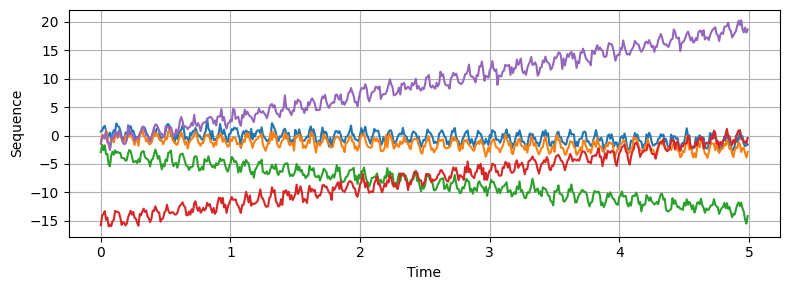

In [33]:
dt = 0.01
t = np.arange(0, 5, dt)

n_series = 30
l_series = []

coes_mean = np.random.normal(0, 2, n_series)
coes_std = np.random.normal(0, 0.1, n_series)
start = np.random.normal(0, 10, n_series)
for i in range(n_series):
    # mean = 0 + np.abs(coes_mean[i]+coes_std[i])*t
    mean = start[i] + (coes_mean[i]+coes_std[i])*t
    nse = np.random.normal(mean, 0.5, len(t)) # white noise
    s = np.sin(2 * np.pi * 10 * t) + nse
    l_series.append(s)

print("len(l_series)",len(l_series))

fig, axs = plt.subplots(1, 1, figsize=(8,3))
indices = np.random.randint(0,n_series,5)
print('indices',indices)
axs.plot(t, l_series[indices[0]], t, l_series[indices[1]], t, l_series[indices[2]], t, l_series[indices[3]],t, l_series[indices[4]])
axs.set_xlabel('Time')
axs.set_ylabel('Sequence')
axs.grid(True)
 
fig.tight_layout()
plt.show()

In [146]:
dates = np.arange(len(t))

x = []
date = []
domain = []
for i in range(n_series):
    x += list(l_series[i])
    date += list(dates)
    domain += [i]*len(t)

d = {'x': x, 'date': date, 'domain':domain}
df = pd.DataFrame(data=d)

df['x_lagged'] = df.groupby(['domain'])['x'].shift(1)
df['x_lagged'] = df['x_lagged'].fillna(0)

dataset_name = 'samepmv_difft30'
# with open(f'../data/syn/df_{dataset_name}.pkl','wb') as f:
#     pickle.dump(df, f)
dim_maxseqlen = 50

idx = df.groupby(['domain'])['x'].rolling(dim_maxseqlen).count()
idx = idx[idx == dim_maxseqlen]
indices = (idx.index.get_level_values(1) - dim_maxseqlen + 1)
dates = df['date'][indices]
domain_nbrs = df['domain'][indices]
domain_index_array = domain_nbrs.reset_index()
index_array = dates.reset_index()
index_array = pd.merge(index_array, domain_index_array, left_on=['index'], right_on=['index'], how='left')

df = df.drop(columns=['date'])

filepath = f'../data/syn/df_{dataset_name}.h5'
store = pd.HDFStore(filepath)
df.to_hdf(filepath, key=dataset_name)
index_array.to_hdf(filepath, key='index')
store.close()
print(f'{dataset_name} saved!')


samepmv_difft30 saved!


### samep_diffmv (PT-N)
 - Different noise (mean & variance)
 - Same trend (no trend)
 - Same period

indices [15 25  3 23 25]


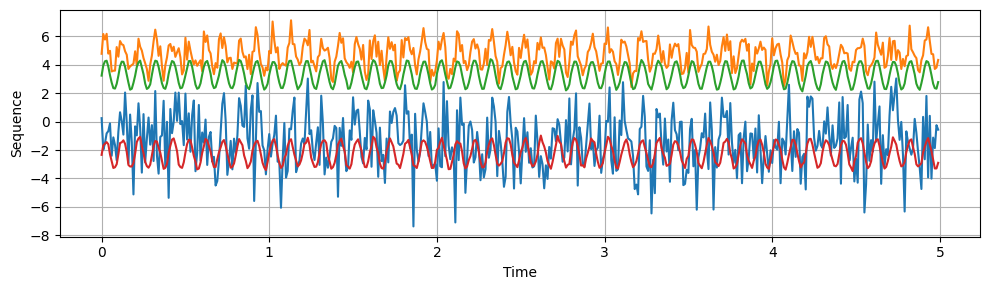

In [32]:
dt = 0.01
t = np.arange(0, 5, dt)

n_series = 30
l_series = []
means = np.random.normal(0, 2, n_series)
stds = np.random.normal(0, 1, n_series)
for i in range(n_series):
    mean = means[i]
    std = stds[i]
    nse = np.random.normal(mean, np.abs(std), len(t)) # white noise
    s2 = np.sin(2 * np.pi * 10 * t) + nse
    l_series.append(s2)

fig, axs = plt.subplots(1, 1, figsize=(10,3))
indices = np.random.randint(0,n_series,5)
print('indices',indices)
axs.plot(t, l_series[indices[0]], t, l_series[indices[1]], t, l_series[indices[2]], t, l_series[indices[3]])
axs.set_xlabel('Time')
axs.set_ylabel('Sequence')
axs.grid(True)
 
fig.tight_layout()
plt.show()

In [11]:
dates = np.arange(len(t))

x = []
date = []
domain = []
for i in range(n_series):
    x += list(l_series[i])
    date += list(dates)
    domain += [i]*len(t)

d = {'x': x, 'date': date, 'domain':domain}
df = pd.DataFrame(data=d)

df['x_lagged'] = df.groupby(['domain'])['x'].shift(1)
df['x_lagged'] = df['x_lagged'].fillna(0)

dataset_name = 'samep_diffmv'+str(n_series)
# with open(f'../data/syn/df_{dataset_name}.pkl','wb') as f:
#     pickle.dump(df, f)
dim_maxseqlen = 50

idx = df.groupby(['domain'])['x'].rolling(dim_maxseqlen).count()
idx = idx[idx == dim_maxseqlen]
indices = (idx.index.get_level_values(1) - dim_maxseqlen + 1)
dates = df['date'][indices]
domain_nbrs = df['domain'][indices]
domain_index_array = domain_nbrs.reset_index()
index_array = dates.reset_index()
index_array = pd.merge(index_array, domain_index_array, left_on=['index'], right_on=['index'], how='left')

df = df.drop(columns=['date'])

filepath = f'../data/syn/df_{dataset_name}.h5'
store = pd.HDFStore(filepath)
df.to_hdf(filepath, key=dataset_name)
index_array.to_hdf(filepath, key='index')
store.close()
print(f'{dataset_name} saved!')


samep_diffmv50 saved!


### samemv_diffp (NT-P)
 - Different period
 - Same trend
 - Same noise (same mean, same variance)

indices [20 26 20  8  1]


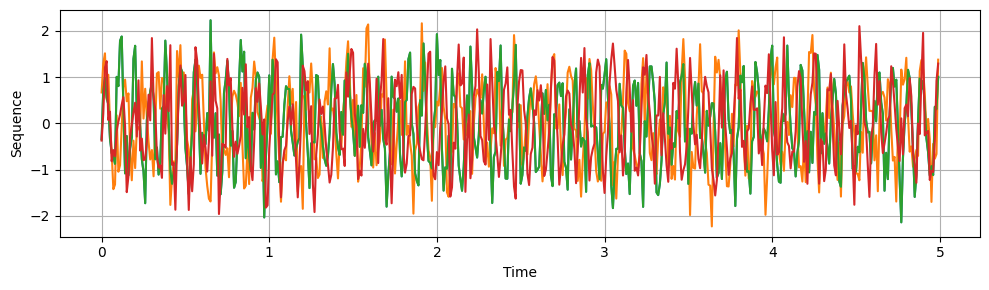

In [31]:
dt = 0.01
t = np.arange(0, 5, dt)

n_series = 30
l_series = []
coes = np.random.normal(10, 2, n_series)
for i in range(n_series):
    coe = coes[i]
    nse = np.random.normal(0, 0.5, len(t)) # white noise
    s = np.sin(2 * np.pi * coe * t) + nse
    l_series.append(s)


fig, axs = plt.subplots(1, 1, figsize=(10,3))
indices = np.random.randint(0,n_series,5)
print('indices',indices)
axs.plot(t, l_series[indices[0]], t, l_series[indices[1]], t, l_series[indices[2]], t, l_series[indices[3]])
axs.set_xlabel('Time')
axs.set_ylabel('Sequence')
axs.grid(True)
 
fig.tight_layout()
plt.show()

In [15]:
dates = np.arange(len(t))

x = []
date = []
domain = []
for i in range(n_series):
    x += list(l_series[i])
    date += list(dates)
    domain += [i]*len(t)

d = {'x': x, 'date': date, 'domain':domain}
df = pd.DataFrame(data=d)

df['x_lagged'] = df.groupby(['domain'])['x'].shift(1)
df['x_lagged'] = df['x_lagged'].fillna(0)

dataset_name = 'samemv_diffp'+str(n_series)
# with open(f'../data/syn/df_{dataset_name}.pkl','wb') as f:
#     pickle.dump(df, f)
dim_maxseqlen = 30

idx = df.groupby(['domain'])['x'].rolling(dim_maxseqlen).count()
idx = idx[idx == dim_maxseqlen]
indices = (idx.index.get_level_values(1) - dim_maxseqlen + 1)
dates = df['date'][indices]
domain_nbrs = df['domain'][indices]
domain_index_array = domain_nbrs.reset_index()
index_array = dates.reset_index()
index_array = pd.merge(index_array, domain_index_array, left_on=['index'], right_on=['index'], how='left')

df = df.drop(columns=['date'])

filepath = f'../data/syn/df_{dataset_name}.h5'
store = pd.HDFStore(filepath)
df.to_hdf(filepath, key=dataset_name)
index_array.to_hdf(filepath, key='index')
store.close()
print(f'{dataset_name} saved!')


samemv_diffp50 saved!


### samet_diffpmv (T-PN)
 - Different period
 - Different noise (same mean, same variance)
 - Same trend

indices [16 14  0 19 23]


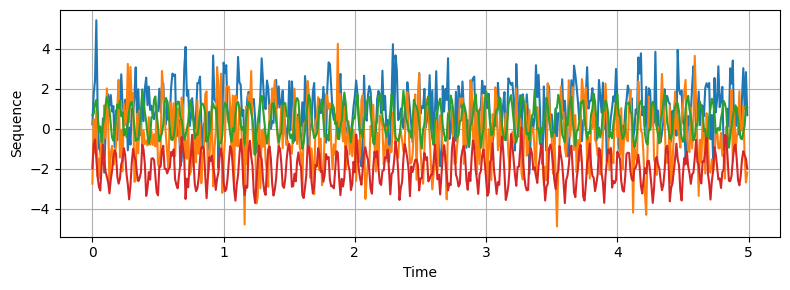

In [30]:
dt = 0.01
t = np.arange(0, 5, dt)

n_series = 30
l_series = []
coes = np.random.normal(10, 2, n_series)


means = np.random.normal(0, 2, n_series)
stds = np.random.normal(0, 1, n_series) 

for i in range(n_series):
    coe = coes[i]
    nse = np.random.normal(means[i], np.abs(stds[i]), len(t)) 
    s = np.sin(2 * np.pi * coe * t) + nse
    l_series.append(s)


fig, axs = plt.subplots(1, 1, figsize=(8,3))
indices = np.random.randint(0,n_series,5)
print('indices',indices)
axs.plot(t, l_series[indices[0]], t, l_series[indices[1]], t, l_series[indices[2]], t, l_series[indices[3]])
axs.set_xlabel('Time')
axs.set_ylabel('Sequence')
axs.grid(True)
 
fig.tight_layout()
plt.show()

In [86]:
dates = np.arange(len(t))

x = []
date = []
domain = []
for i in range(n_series):
    x += list(l_series[i])
    date += list(dates)
    domain += [i]*len(t)

d = {'x': x, 'date': date, 'domain':domain}
df = pd.DataFrame(data=d)

df['x_lagged'] = df.groupby(['domain'])['x'].shift(1)
df['x_lagged'] = df['x_lagged'].fillna(0)

dataset_name = 'samet_diffpmv30'
# with open(f'../data/syn/df_{dataset_name}.pkl','wb') as f:
#     pickle.dump(df, f)
dim_maxseqlen = 50

idx = df.groupby(['domain'])['x'].rolling(dim_maxseqlen).count()
idx = idx[idx == dim_maxseqlen]
indices = (idx.index.get_level_values(1) - dim_maxseqlen + 1)
dates = df['date'][indices]
domain_nbrs = df['domain'][indices]
domain_index_array = domain_nbrs.reset_index()
index_array = dates.reset_index()
index_array = pd.merge(index_array, domain_index_array, left_on=['index'], right_on=['index'], how='left')

df = df.drop(columns=['date'])

filepath = f'../data/syn/df_{dataset_name}.h5'
store = pd.HDFStore(filepath)
df.to_hdf(filepath, key=dataset_name)
index_array.to_hdf(filepath, key='index')
store.close()
print(f'{dataset_name} saved!')


samet_diffpmv30 saved!
